<a href="https://colab.research.google.com/github/1kaiser/Snow-cover-area-estimation/blob/main/OpenAltimetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OpenAltimetry ICESat-2: Elevation Workflow
Overview


This notebook pulls data from ICESat-2 surface-specific products - ATL06, ATL07, ATL08, ATL10, ATL12, ATL13 via the OpenAltimetry API.


Instructions
Replace the "OA_API_URL" string with the data copied from : "Copy API URL" from the OpenAltimetry elevation chart and start visualizing your data!
Author: Minh Phan - mnphan@ucsd.edu. Based off the work of Luis Lopez - luis.lopez@nsidc.org

## get all the **ICESAT-2** tracks in the region of interest

In [86]:
import requests
import json

# Bounding box coordinates
left   = 75.7402
right  = 78.0225
bottom = 31.0597
top    = 32.7295

#function to get tracks 
def getData(url):
    series = []
    b_url = url

    print('Requesting data from OA >>> ',b_url)
    r = requests.get(b_url)
    data = r.json()
    return data

url = 'https://openaltimetry.org/data/api/icesat2/getTracks?minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&outputFormat=json'
getData(url)

Requesting data from OA >>>  https://openaltimetry.org/data/api/icesat2/getTracks?minx=75.7402&miny=31.0597&maxx=78.0225&maxy=32.7295&outputFormat=json


{'input': {'date': None,
  'extent': {'minlon': 75.7402,
   'maxlon': 78.0225,
   'minlat': 31.0597,
   'maxlat': 32.7295}},
 'output': {'total': 19,
  'track': [5,
   66,
   89,
   150,
   211,
   272,
   386,
   447,
   508,
   592,
   653,
   714,
   889,
   950,
   1011,
   1034,
   1095,
   1156,
   1331]}}

#**ALT06 LAND ICE ELEVATION**

In [ ]:
import json
import requests

# Bounding box coordinates
left   = 75.979728
right  = 77.866667
bottom = 31.453599
top    = 32.416667

date = '2019-10-26'
trackid = 447


OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl06?date='+date+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(trackid)+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'

OA_API_URL += '&client=jupyter';

print(OA_API_URL)

r = requests.get(OA_API_URL)
data = r.json()


In [ ]:
data

**[dates and track id google sheet](https://docs.google.com/spreadsheets/d/13sjRCD2E2oyjkJwXOxeu5P3V6Ql9nW0KZe1gnsPFNOM/edit?usp=sharing)**


![image](https://user-images.githubusercontent.com/26379748/227423479-8e35d0da-3617-4c01-bf77-8074ebeb14e2.png)


In [ ]:
a = [["2019-02-24",889],]

In [ ]:
len(a)

In [ ]:
import pandas as pd
import json
import requests
import plotly.graph_objects as go
from plotly.offline import iplot
from pathlib import Path  



filepath = Path('889_FEB_2020.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  

# Bounding box coordinates
left   = 75.979728
right  = 77.866667
bottom = 31.453599
top    = 32.416667

date = '2019-10-26'
trackid = 447

# We populate a list with the elevation data using the OpenAltimetry API
OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl06?date='+date+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(trackid)+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'

OA_API_URL += '&client=jupyter';

OA_BEAMS = ['gt1r', 'gt1l', 'gt2r', 'gt2l', 'gt3r', 'gt3l']

df_beams = []
oa_plots = []
complete_dataset = []
# This function will request the 6 tracks using OpenAltimetry's API
def getData(url):
    series = []
    b_url = url

    print('Requesting data from OA >>> ',b_url)
    r = requests.get(b_url)
    data = r.json()
    return data


b =[]
for i in range(len(a)):
  OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl06?date='+a[i][0]+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(a[i][1])+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'
  OA_API_URL += '&client=jupyter';
  b.append(getData(OA_API_URL))

for elevation_data in b:
  product = elevation_data["product"]

  print('Reading data product: ' + product)

  for series_beam in elevation_data['series']:
      if any(word in series_beam['beam'] for word in OA_BEAMS):
          series = []
          
          data_name = 'lat_lon_elev'
          if product == 'ATL08':
              data_name = 'lat_lon_elev_canopy'

          for p in series_beam[data_name]:
              series.append({
                  'lat': p[0],
                  'lon': p[1],
                  'h': p[2]
              })
              
          print ('beam ' + series_beam['beam'] + ' - len = ' + str(len(series)))

          if (len(series) > 0):
              df = pd.DataFrame.from_dict(series)
              df.name = series_beam['beam']
              df_beams.append(df)


 
              
  print('df_beams len: ' + str(len(df_beams)))

# <<<<SAVING TO .csv FILE>>>>
pd.concat(df_beams).to_csv(filepath)

for df in df_beams:
    oa_plots.append(go.Scatter3d(name=df.name, x=df['lat'], y=df['lon'], z=df['h'],
                                    marker=dict(
                                        size=2,
                                        color=df['h'],
                                        colorscale='Viridis',   # choose a colorscale
                                        opacity=0.8
                                    ),
                                    line=dict(
                                        color='darkblue',
                                        width=2
                                    )
                                )
                   )

layout = go.Layout(
    width=1200,
    height=600,
    scene = dict(aspectmode = 'manual', aspectratio =dict(x=1, y=1, z=0.5),
                 xaxis=dict(title='Latitude'), yaxis=dict(title='Longitude'), zaxis=dict(title='Elevation (m)'))
)

print('Plotting...')

fig = go.Figure(data=oa_plots, layout=layout)

iplot(fig)


Requesting data from OA >>>  https://openaltimetry.org/data/api/icesat2/atl06?date=2019-02-24&minx=75.979728&miny=31.453599&maxx=77.866667&maxy=32.416667&trackId=889&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json&client=jupyter
Reading data product: ATL06
beam gt3r - len = 2745
beam gt3l - len = 3090
beam gt2r - len = 2033
beam gt2l - len = 2736
beam gt1r - len = 1793
beam gt1l - len = 2637
df_beams len: 6
Plotting...


In [ ]:
pd.concat(df_beams)


https://openaltimetry.org

In [ ]:
a = !curl -X GET "https://openaltimetry.org/data/api/icesat2/atl06?date=2019-10-26&minx=75.979728&miny=31.453599&maxx=77.866667&maxy=32.416667&trackId=447&client=portal&outputFormat=json" -H "accept: */*"

In [ ]:
a

In [ ]:
!wget https://openaltimetry.org/data/api/icesat2/getTracks?date=2019-10-26&minx=75.979728&miny=31.453599&maxx=77.866667&maxy=32.416667&outputFormat=json -O a.json


**VISUALIZATION**

In [ ]:
a = np.asarray([[	"	A	"	,	"	10/23/2018	"	,	]	,
[	"	B	"	,	"	10/27/2018	"	,	]	,
[	"	C	"	,	"	11/6/2018	"	,	]	,
[	"	D	"	,	"	11/10/2018	"	,	]	,
[	"	E	"	,	"	11/14/2018	"	,	]	,
[	"	F	"	,	"	11/25/2018	"	,	]	,
[	"	G	"	,	"	11/29/2018	"	,	]	,
[	"	H	"	,	"	12/3/2018	"	,	]	,
[	"	I	"	,	"	12/5/2018	"	,	]	,
[	"	J	"	,	"	12/13/2018	"	,	]	,
[	"	K	"	,	"	12/24/2018	"	,	]	,
[	"	L	"	,	"	12/28/2018	"	,	]	,
[	"	M	"	,	"	1/1/2019	"	,	]	,
[	"	N	"	,	"	1/3/2019	"	,	]	])

In [ ]:
from numpy.core.fromnumeric import transpose
a = transpose(a)
a.shape

In [ ]:
b = np.ones((4,10))+np.ones((4,10))
b.shape
b

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data1 = a

colors1 = ['C{}'.format(i) for i in range(4)]

lineoffsets1 = [-4, -3]
linelengths1 = [1, 2 ]

plt.eventplot(data1, colors=colors1, lineoffsets=lineoffsets1, linelengths=linelengths1)
plt.title('Event Plot')
plt.xlabel('Time(s)')
plt.ylabel('Signal')

#**ALT08 GROUND AND CANOPY HEIGHT**

In [ ]:
import json
import requests

# Bounding box coordinates
left   = 77.301555
right  = 77.637165
bottom = 31.779603
top    = 32.041187

date = '2019-02-24'
trackid = 889


OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl08?date='+date+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(trackid)+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'

OA_API_URL += '&client=jupyter';

print(OA_API_URL)

r = requests.get(OA_API_URL)
data = r.json()


In [ ]:
data

In [ ]:
a = [["2019-05-26",889],]

In [ ]:
import pandas as pd
import json
import requests
import plotly.graph_objects as go
from plotly.offline import iplot
from pathlib import Path  

filepath = Path('889MAYALT08_2019_MS.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  

# Bounding box coordinates
left   = 77.301555
right  = 77.637165
bottom = 31.779603
top    = 32.041187


date = '2019-10-26'
trackid = 447

# We populate a list with the elevation data using the OpenAltimetry API
OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl08?date='+date+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(trackid)+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'

OA_API_URL += '&client=jupyter';

OA_BEAMS = ['gt1r', 'gt1l', 'gt2r', 'gt2l', 'gt3r', 'gt3l']

df_beams = []
oa_plots = []
complete_dataset = []
# This function will request the 6 tracks using OpenAltimetry's API
def getData(url):
    series = []
    b_url = url

    print('Requesting data from OA >>> ',b_url)
    r = requests.get(b_url)
    data = r.json()
    return data


b =[]
for i in range(len(a)):
  OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl08?date='+a[i][0]+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(a[i][1])+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'
  OA_API_URL += '&client=jupyter';
  b.append(getData(OA_API_URL))

for elevation_data in b:
  product = elevation_data["product"]

  print('Reading data product: ' + product)

  for series_beam in elevation_data['series']:
      if any(word in series_beam['beam'] for word in OA_BEAMS):
          series = []
          
          data_name = 'lat_lon_elev'
          if product == 'ATL08':
              data_name = 'lat_lon_elev_canopy'

          for p in series_beam[data_name]:
              series.append({
                  'lat': p[0],
                  'lon': p[1],
                  'h': p[2],
                  'Canopy': p[3]
              })
              
          print ('beam ' + series_beam['beam'] + ' - len = ' + str(len(series)))

          if (len(series) > 0):
              df = pd.DataFrame.from_dict(series)
              df.name = series_beam['beam']
              df_beams.append(df)


 
              
  print('df_beams len: ' + str(len(df_beams)))

# <<<<SAVING TO .csv FILE>>>>
pd.concat(df_beams).to_csv(filepath)

for df in df_beams:
    oa_plots.append(go.Scatter3d(name=df.name, x=df['lat'], y=df['lon'], z=df['h'],
                                    marker=dict(
                                        size=2,
                                        color=df['h'],
                                        colorscale='Viridis',   # choose a colorscale
                                        opacity=0.8
                                    ),
                                    line=dict(
                                        color='darkblue',
                                        width=2
                                    )
                                )
                   )

layout = go.Layout(
    width=1200,
    height=600,
    scene = dict(aspectmode = 'manual', aspectratio =dict(x=1, y=1, z=0.5),
                 xaxis=dict(title='Latitude'), yaxis=dict(title='Longitude'), zaxis=dict(title='Elevation (m)'))
)

print('Plotting...')

fig = go.Figure(data=oa_plots, layout=layout)

iplot(fig)


#**ALT03 RAW DATA**

In [ ]:
import json
import requests

# Bounding box coordinates
left   = 77.301555
right  = 77.637165
bottom = 31.779603
top    = 32.041187

date = '2019-02-24'
trackid = 889


OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl03?date='+date+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(trackid)+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&sampling=true&outputFormat=json'

OA_API_URL += '&client=jupyter';

print(OA_API_URL)

r = requests.get(OA_API_URL)
data = r.json()


In [ ]:
data

In [ ]:
a = [["2019-02-24",889],]

In [ ]:
import pandas as pd
import json
import requests
import plotly.graph_objects as go
from plotly.offline import iplot
from pathlib import Path  

filepath = Path('ALT03_2019_FEB.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  

# Bounding box coordinates
left   = 77.301555
right  = 77.637165
bottom = 31.779603
top    = 32.041187

date = '2019-05-26'
trackid = 889

# We populate a list with the elevation data using the OpenAltimetry API
OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl03?date='+date+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(trackid)+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&sampling=true&outputFormat=json'

OA_API_URL += '&client=jupyter';


df_beams = []
oa_plots = []
complete_dataset = []
# This function will request the 6 tracks using OpenAltimetry's API
def getData(url):
    series = []
    b_url = url

    print('Requesting data from OA >>> ',b_url)
    r = requests.get(b_url)
    data = r.json()
    return data


b =[]
for i in range(len(a)):
  OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl03?date='+a[i][0]+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(a[i][1])+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&sampling=false&outputFormat=json'
  OA_API_URL += '&client=jupyter';
  b.append(getData(OA_API_URL))

OA_BEAMS = ['Noise', 'Buffer', 'Low', 'Medium', 'High']
df_beams = []

for elevation_data in b[0]:
  product = elevation_data['beam_name']

  print('\n Reading data product: ' + product)
  for series_beam in elevation_data['series']:
    if any(word in series_beam['name'] for word in OA_BEAMS):
      series = []
      
      data_name = 'data'

      for p in series_beam[data_name]:
          series.append({
              'lat': p[0],
              'lon': p[1],
              'h': p[2]
          })
          
      print ('beam ' + series_beam['name'] + ' - len = ' + str(len(series)))

      if (len(series) > 0):
          df = pd.DataFrame.from_dict(series)
          print(len(df))
          df = df[(df.lon >= left) & (df.lon <= right) & (df.lat >= bottom) & (df.lat <= top)]
          print(len(df))
          df.name = series_beam['name']
          df_beams.append(df) 
              
  print('df_beams len: ' + str(len(df_beams)))

# <<<<SAVING TO .csv FILE>>>>
pd.concat(df_beams).to_csv(filepath)

# for df in df_beams:
#     oa_plots.append(go.Scatter3d(name=df.name, x=df['lat'], y=df['lon'], z=df['h'],
#                                     marker=dict(
#                                         size=2,
#                                         color=df['h'],
#                                         colorscale='Viridis',   # choose a colorscale
#                                         opacity=0.8
#                                     ),
#                                     line=dict(
#                                         color='darkblue',
#                                         width=2
#                                     )
#                                 )
#                    )

# layout = go.Layout(
#     width=1200,
#     height=600,
#     scene = dict(aspectmode = 'manual', aspectratio =dict(x=1, y=1, z=0.5),
#                  xaxis=dict(title='Latitude'), yaxis=dict(title='Longitude'), zaxis=dict(title='Elevation (m)'))
# )

# print('Plotting...')

# fig = go.Figure(data=oa_plots, layout=layout)

# iplot(fig)


Requesting data from OA >>>  https://openaltimetry.org/data/api/icesat2/atl03?date=2019-02-24&minx=77.301555&miny=31.779603&maxx=77.637165&maxy=32.041187&trackId=889&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&sampling=false&outputFormat=json&client=jupyter

 Reading data product: gt3r
beam Noise - len = 6345
6345
6345
beam Buffer - len = 85
85
85
beam Low - len = 150
150
150
beam Medium - len = 549
549
549
beam High - len = 30824
30824
30824
df_beams len: 5

 Reading data product: gt3l
beam Noise - len = 8122
8122
8122
beam Buffer - len = 1
1
1
beam Low - len = 17
17
17
beam Medium - len = 101
101
101
beam High - len = 42385
42385
42374
df_beams len: 10

 Reading data product: gt2r
beam Noise - len = 6485
6485
6484
beam Buffer - len = 32
32
32
beam Low - len = 150
150
150
beam Medium - len = 429
429
429
beam High - len = 14137
14137
14133
df_beams len: 15

 Reading data product: gt2l
beam Noise - len = 10178
10178
10178
beam Buffer - len = 11
11

In [ ]:
print(df_beams)
del df_beams

In [ ]:
elevation_data[0]['beam_name']

## new test for visualization  [Colab link](https://colab.research.google.com/drive/11BiECdk51MzG5oJIkOT5zexMaL1NRQet)

### *Python programming for Google Earth Engine*
# **OpenAltimetry and Google Earth Engine**

## OBJECTIVES
- Load ICESat-2 data using the OpenAltimetry API.
- Query Google Earth Engine for geospatial raster data and display it along with ICESat-2 ground tracks on an interactive map.
- Better understand what you are looking at in ATL03 features without downloading a bunch of files.

## CREDITS
- This tutorial is originally credited by Wei Ji Leong, Scott Henderson, and Philipp Arndt.
- This tutorial was the part of 2022 ICESat-2 Hackweek [ICESat-2 Hackweek](https://icesat-2.hackweek.io/), and modified by YoungHyun Koo for the UTSA Remote Sensing Image Processing course.
- Original Python script: [Interactive Visualizion with Open Altimetry & Google Earth Engine](https://github.com/ICESAT-2HackWeek/website2022/blob/main/book/tutorials/DataVisualization/Visualization_Earth_Engine_geemap_IS2_HW_2022.ipynb) and [OpenAltimery and GEE Use Examples](https://github.com/ICESAT-2HackWeek/website2022/blob/main/book/tutorials/DataVisualization/Visualization_geemap_use_examples.ipynb).
- More information about ICESat-2 Hackweek: [ICESat-2 Hackweek GitHub](https://github.com/ICESAT-2HackWeek/website2022)

In [101]:
!pip install patchworklib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 KB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 3.1 MB/s eta 0:00:00


In [109]:
#@title ICESAT-2 **[OpenAltimetry API](https://openaltimetry.org/data/icesat2/)** **dataCollector** function

import json
import requests
import pandas as pd

import matplotlib.pylab as plt
import numpy as np

import patchworklib as pw

class dataCollector:
    def __init__(self, beam=None, oaurl=None, track=None, date=None, latlims=None, lonlims=None, verbose=False):
        if (beam is None) or ((oaurl is None) and (None in [track, date, latlims, lonlims])):
            raise Exception('''Please specify a beam and 
            - either: an OpenAltimetry API url, 
            - or: a track, date, latitude limits and longitude limits.''')
        else:
            if oaurl is not None:
                url = oaurl
                tofind = '&beamName='
                ids = url.find(tofind)
                while ids>-1:
                    url = url.replace(url[ids:ids+len(tofind)+4],'')
                    ids = url.find(tofind)
                iprod = url.find('/atl')
                url = url.replace(url[iprod:iprod+6],'/atlXX')
                url += tofind + beam + '&client=jupyter'

                idate = url.find('date=') + len('date=')
                date = url[idate:idate+10]
                itrack = url.find('trackId=') + len('trackId=')
                trackend = url[itrack:].find('&')
                track = int(url[itrack:itrack+trackend])
                bb = []
                for s in ['minx=', 'maxx=', 'miny=', 'maxy=']:
                    ids = url.find(s) + len(s)
                    ide = url[ids:].find('&')
                    bb.append(float(url[ids:ids+ide]))
                lonlims = bb[:2]
                latlims = bb[2:]
            elif None not in [track, date, latlims, lonlims]:
                url = 'https://openaltimetry.org/data/api/icesat2/atlXX?'
                url += 'date={date}&minx={minx}&miny={miny}&maxx={maxx}&maxy={maxy}&trackId={track}&beamName={beam}'.format(
                        date=date,minx=lonlims[0],miny=latlims[0],maxx=lonlims[1],maxy=latlims[1],track=track,beam=beam)
                url += '&outputFormat=json&client=jupyter'
            
            self.url = url
            self.date = date
            self.track = track
            self.beam = beam
            self.latlims = latlims
            self.lonlims = lonlims
            if verbose:
                print('OpenAltimetry API URL:', self.url)
                print('Date:', self.date)
                print('Track:', self.track)
                print('Beam:', self.beam)
                print('Latitude limits:', self.latlims)
                print('Longitude limits:', self.lonlims)
            
    def requestData(self, verbose=False): 
        if verbose:
            print('---> requesting ATL03 data...',end='')
        product = 'atl03'
        request_url = self.url.replace('atlXX',product)
        data = requests.get(request_url).json()
        lat, lon, h, confs = [], [], [], []
        for beam in data:
            for confidence in beam['series']:
                for p in confidence['data']:
                    confs.append(confidence['name'])
                    lat.append(p[0])
                    lon.append(p[1])
                    h.append(p[2])
        self.atl03 = pd.DataFrame(list(zip(lat,lon,h,confs)), columns = ['lat','lon','h','conf'])
        if verbose:
            print(' Done.')
            
            print('---> requesting ATL06 data...',end='')
        product = 'atl06'
        request_url = self.url.replace('atlXX',product)
        data = requests.get(request_url).json()
        self.atl06 = pd.DataFrame(data['series'][0]['lat_lon_elev'], columns = ['lat','lon','h'])
        if verbose:
            print(' Done.')
            
            print('---> requesting ATL08 data...',end='')
        product = 'atl08'
        request_url = self.url.replace('atlXX',product)
        data = requests.get(request_url).json()
        self.atl08 = pd.DataFrame(data['series'][0]['lat_lon_elev_canopy'], columns = ['lat','lon','h','canopy'])
        if verbose:
            print(' Done.')
    
    ################################################################################################ 
    def plotData(self,ax=None,title='some Data I found on OpenAltimetry'):

        # get data if not already there
        if 'atl03' not in vars(self).keys(): 
            print('Data has not yet been requested from OpenAltimetry yet. Doing this now.')
            self.requestData(verbose=True)

        axes_not_specified = True if ax == None else False

        # create the figure and axis
        if axes_not_specified:
            fig, ax = plt.subplots(figsize=[20,6])
        atl03 = ax.scatter(self.atl03.lat, self.atl03.h, s=2, color='black', alpha=0.2, label='ATL03')
        atl06, = ax.plot(self.atl06.lat, self.atl06.h, label='ATL06')
        atl08, = ax.plot(self.atl08.lat, self.atl08.h, label='ATL08', linestyle='--')

        heights = self.atl03.h[self.atl03.conf != 'Noise']
        y_min1 = np.min(heights)
        y_max1 = np.max(heights)
        maxprods = np.nanmax((self.atl06.h.max(), self.atl08.h.max()))
        minprods = np.nanmin((self.atl06.h.min(), self.atl08.h.min()))
        hrange = maxprods - minprods
        y_min2 = minprods - hrange * 0.5
        y_max2 = maxprods + hrange * 0.5
        y_min = np.nanmin((y_min1, y_min2))
        y_max = np.nanmax((y_max1, y_max2))

        x_min = self.atl03.lat.min()
        x_max = self.atl03.lat.max()

        ax.set_xlim((x_min, x_max))
        ax.set_ylim((y_min, y_max))

        # label the axes
        ax.set_title(title)
        ax.set_xlabel('latitude')
        ax.set_ylabel('elevation in meters')

        # add a legend
        ax.legend(loc='lower right')

        # add some text to provide info on what is plotted
        info = 'ICESat-2 track {track:d}-{beam:s} on {date:s}\n({lon:.4f}E, {lat:.4f}N)'.format(track=self.track, 
                                                                                                beam=self.beam, 
                                                                                                date=self.date, 
                                                                                                lon=np.mean(self.lonlims), 
                                                                                                lat=np.mean(self.latlims))
        infotext = ax.text(0.03, 0.03, info,
                           horizontalalignment='left', 
                           verticalalignment='bottom', 
                           transform=ax.transAxes,
                           fontsize=7,
                           bbox=dict(edgecolor=None, facecolor='white', alpha=0.9, linewidth=0))

        if axes_not_specified:
            fig.tight_layout()
            return fig
        else:
            return ax


    

def plot_from_oa_url(url,gtx,title='ICESat-2 Data'):
    mydata = dataCollector(oaurl=url,beam=gtx)
    mydata.requestData()
    myplot = mydata.plotData(title=title)
    return (myplot, mydata)

In [111]:
for i in signals:
  print(signals.index(i))

0
1
2
3
4
5


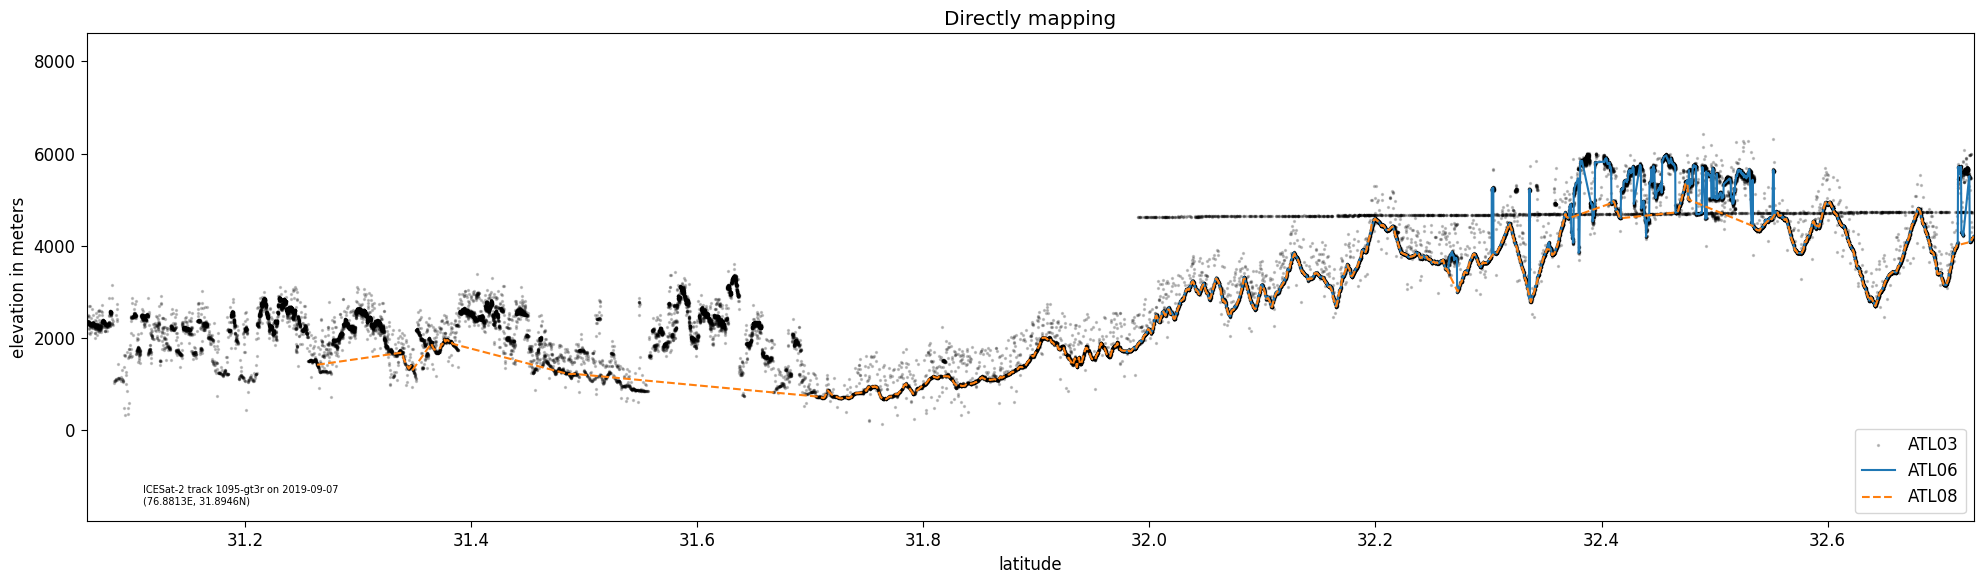

In [113]:
g[0]

gt3r
OpenAltimetry API URL: https://openaltimetry.org/data/api/icesat2/atlXX?date=2019-09-11&minx=75.7402&miny=31.0597&maxx=78.0225&maxy=32.7295&trackId=1156&outputFormat=json&beamName=gt3r&client=jupyter
Date: 2019-09-11
Track: 1156
Beam: gt3r
Latitude limits: [31.0597, 32.7295]
Longitude limits: [75.7402, 78.0225]
---> requesting ATL03 data... Done.
---> requesting ATL06 data... Done.
---> requesting ATL08 data... Done.
gt3l
OpenAltimetry API URL: https://openaltimetry.org/data/api/icesat2/atlXX?date=2019-09-11&minx=75.7402&miny=31.0597&maxx=78.0225&maxy=32.7295&trackId=1156&outputFormat=json&beamName=gt3l&client=jupyter
Date: 2019-09-11
Track: 1156
Beam: gt3l
Latitude limits: [31.0597, 32.7295]
Longitude limits: [75.7402, 78.0225]
---> requesting ATL03 data... Done.
---> requesting ATL06 data... Done.
---> requesting ATL08 data... Done.
gt2r
OpenAltimetry API URL: https://openaltimetry.org/data/api/icesat2/atlXX?date=2019-09-11&minx=75.7402&miny=31.0597&maxx=78.0225&maxy=32.7295&tra

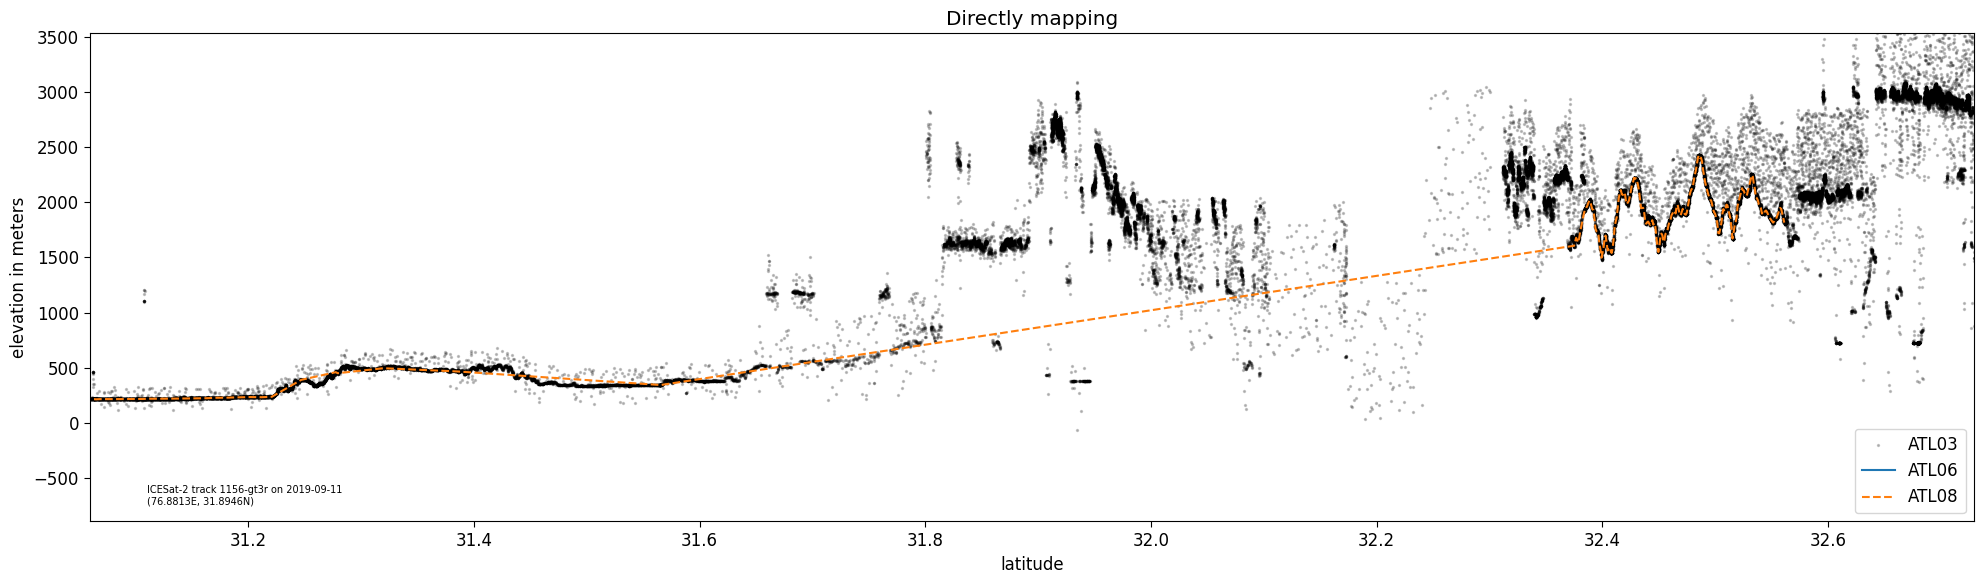

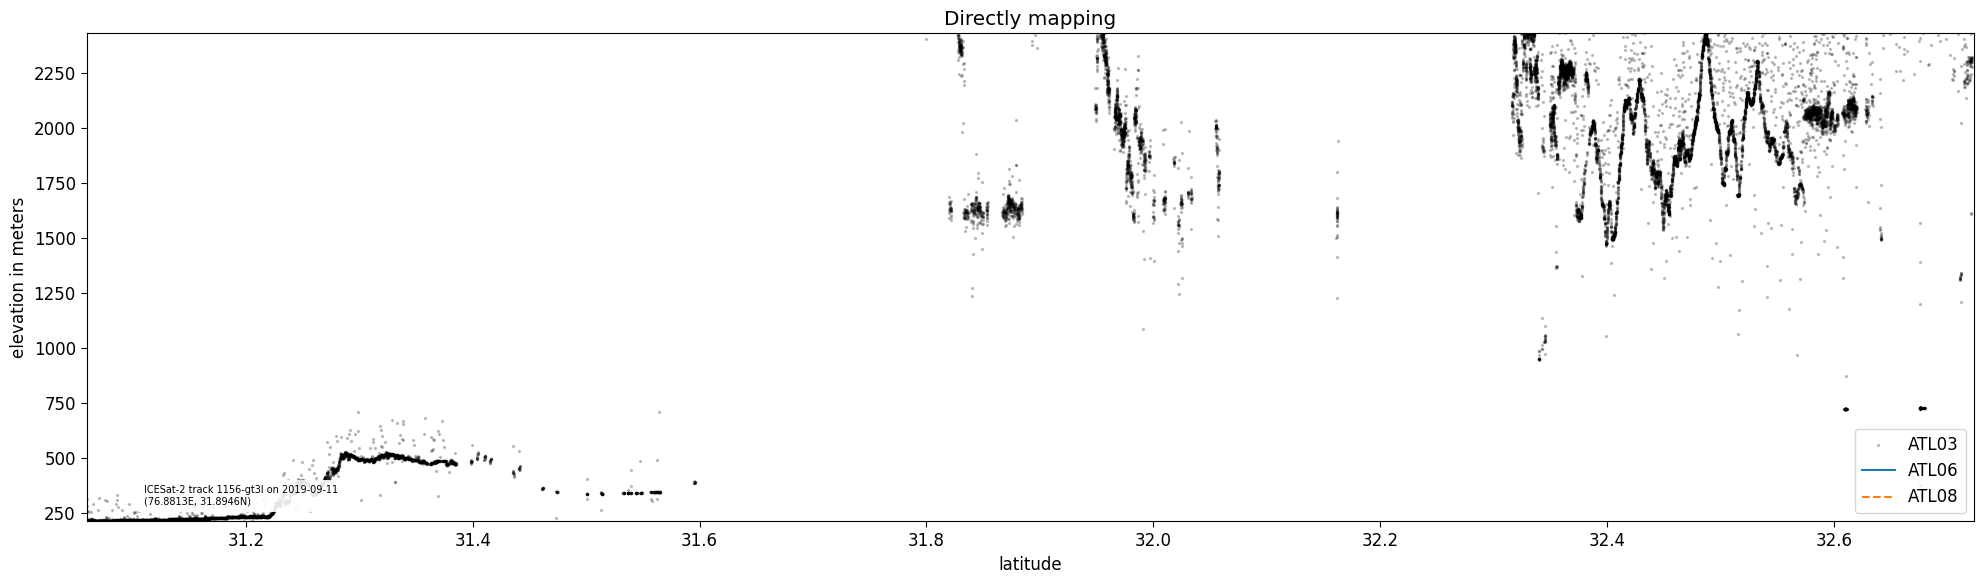

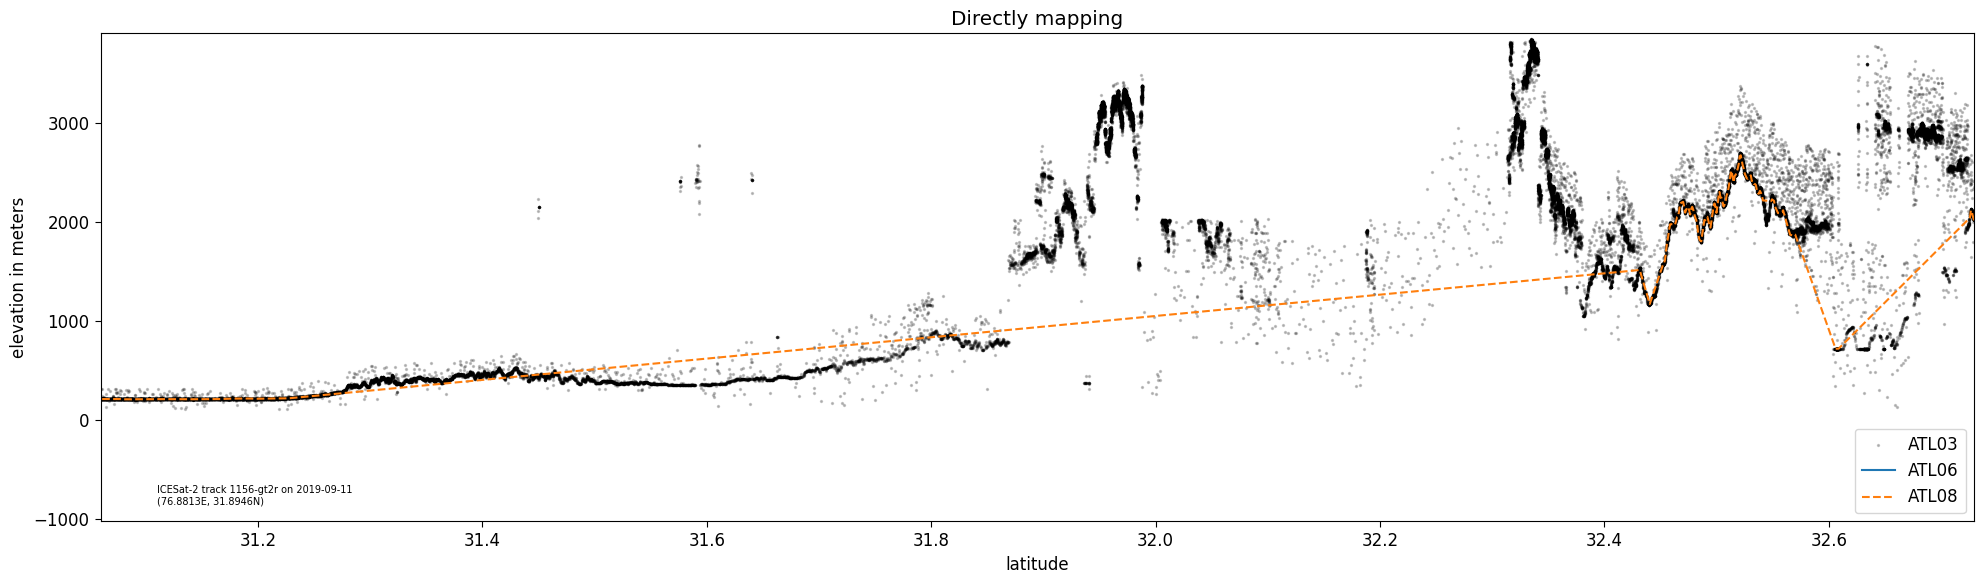

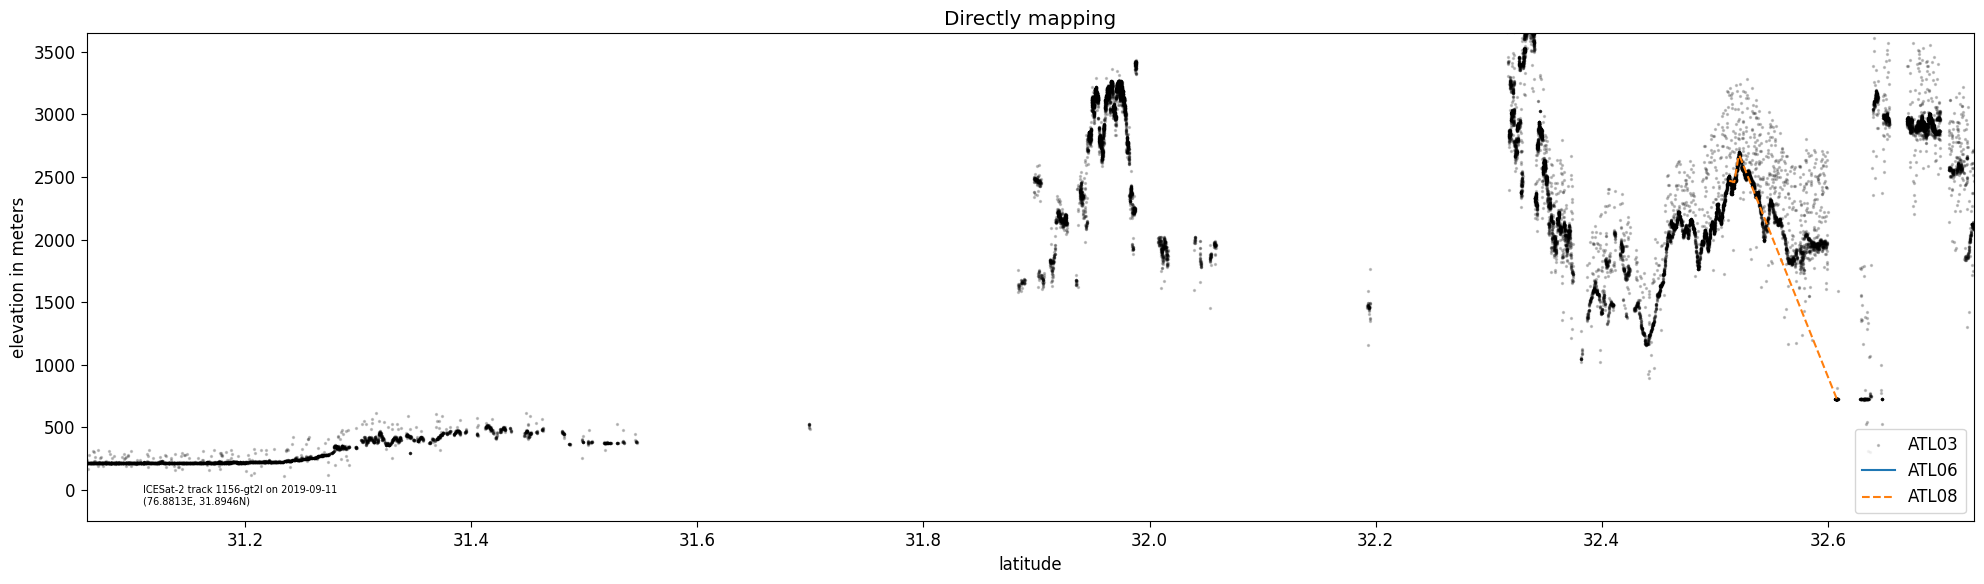

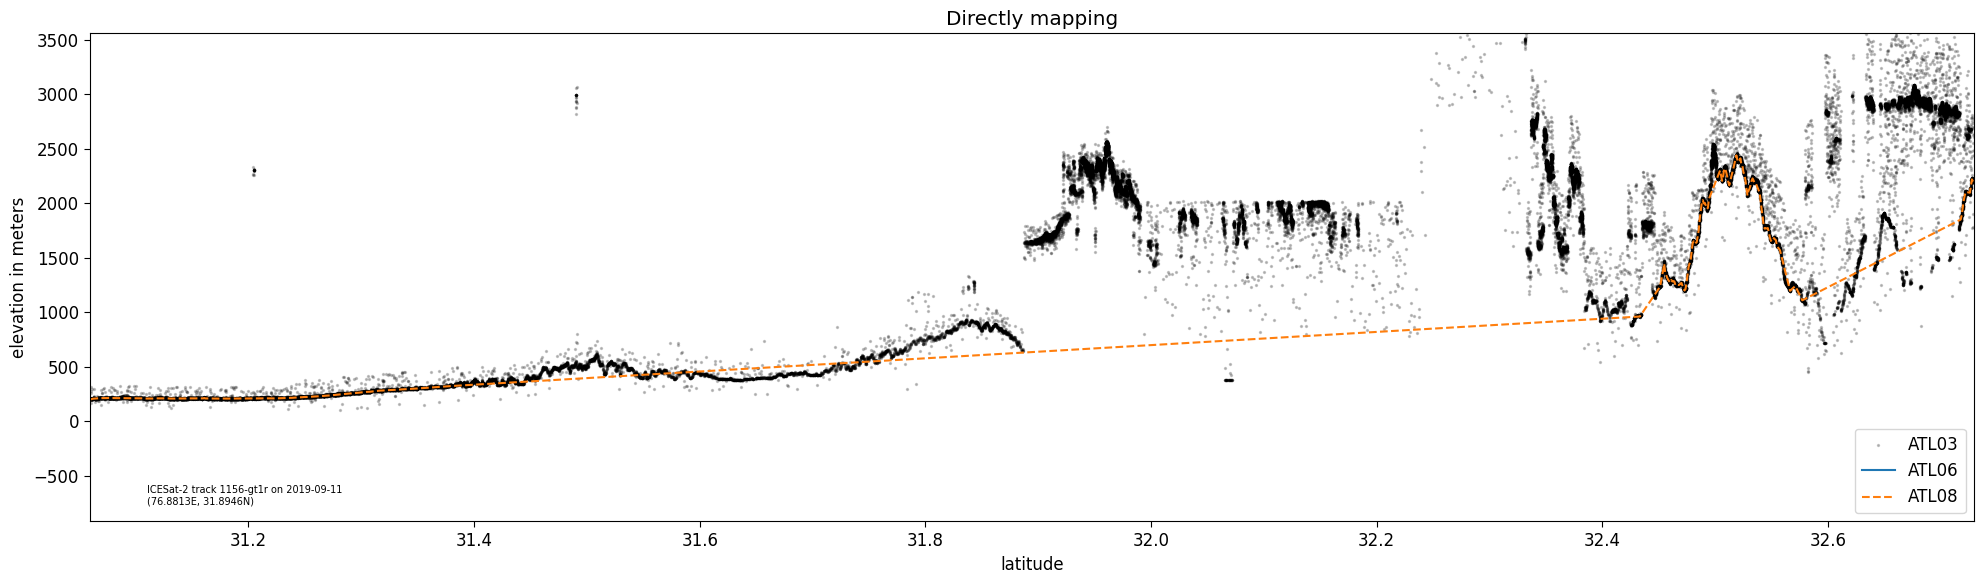

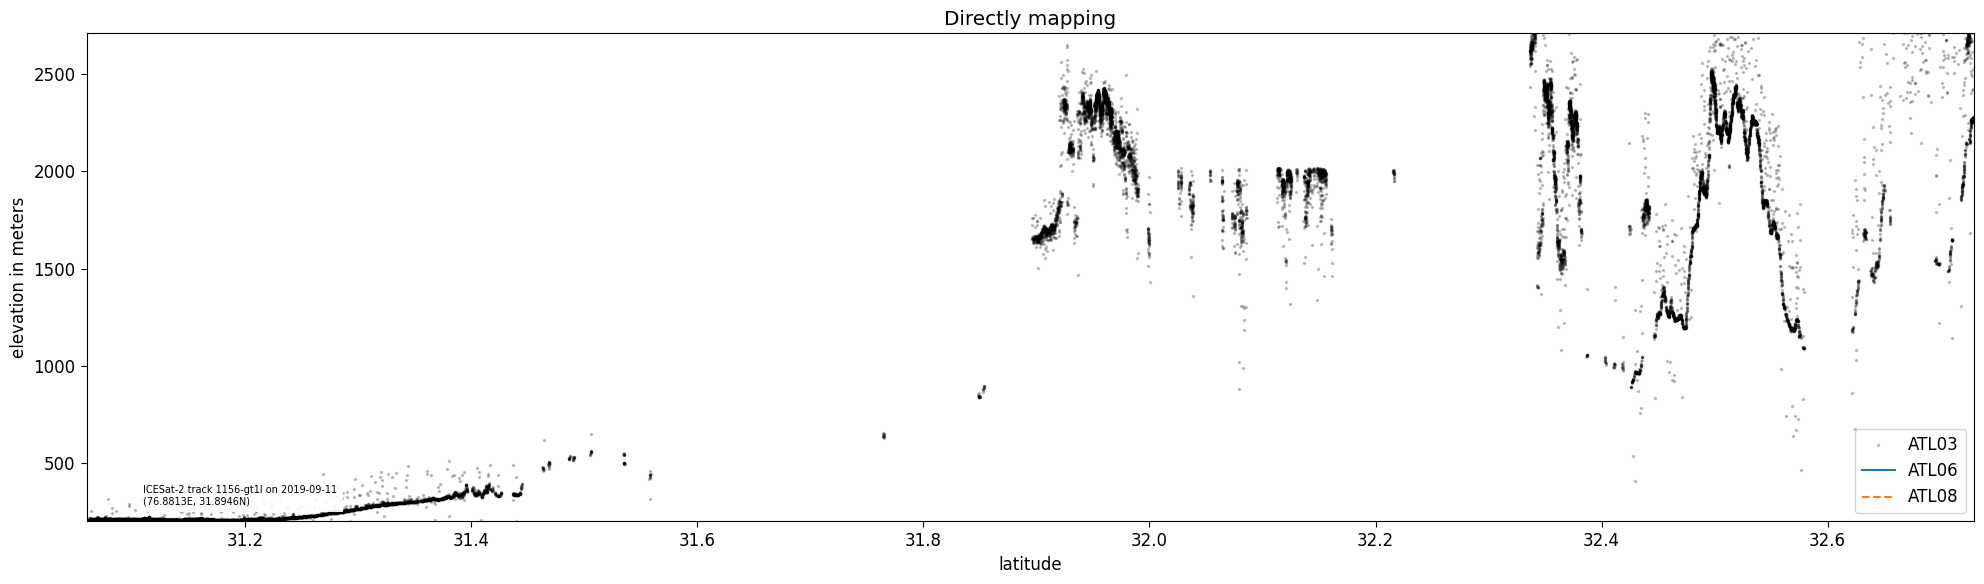

In [114]:

# Bounding box coordinates
left   = 75.7402
right  = 78.0225
bottom = 31.0597
top    = 32.7295

date = [["2019-09-11",1156],
        ]

OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl03?date='+date[0][0]+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(date[0][1])+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'

# OA_API_URL += '&client=jupyter';

signals = ['gt3r', 'gt3l', 'gt2r', 'gt2l', 'gt1r', 'gt1l']

g=[]
for i in signals:
  print(i)
  is2data = dataCollector(oaurl=OA_API_URL,beam=i, verbose=True)
  is2data.requestData(verbose=True)
  myplot, mydata = plot_from_oa_url(url=OA_API_URL, gtx=i, title='Directly mapping')
  g.append(myplot)

In [2]:

# paste the API URL from OpenAltimetry below, and specify the beam you are interested in
oa_api_url = 'http://openaltimetry.org/data/api/icesat2/atl03?date=2020-01-16&minx=12.107692195781404&miny=-70.34956862465471&maxx=12.426364789894341&maxy=-70.2449105354736&trackId=312&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'
gtx = 'gt2r'

In [3]:
is2data = dataCollector(oaurl=oa_api_url,beam=gtx, verbose=True)

OpenAltimetry API URL: http://openaltimetry.org/data/api/icesat2/atlXX?date=2020-01-16&minx=12.107692195781404&miny=-70.34956862465471&maxx=12.426364789894341&maxy=-70.2449105354736&trackId=312&outputFormat=json&beamName=gt2r&client=jupyter
Date: 2020-01-16
Track: 312
Beam: gt2r
Latitude limits: [-70.34956862465471, -70.2449105354736]
Longitude limits: [12.107692195781404, 12.426364789894341]


In [19]:
latlims = [-70.34957, -70.24491]
lonlims = [12.10769, 12.42636]
rgt = 312
gtx = 'gt2r'
date = '2020-01-16'
is2data = dataCollector(date=date, latlims=latlims, lonlims=lonlims, track=rgt, beam=gtx, verbose=True)


OpenAltimetry API URL: https://openaltimetry.org/data/api/icesat2/atlXX?date=2020-01-16&minx=12.10769&miny=-70.34957&maxx=12.42636&maxy=-70.24491&trackId=312&beamName=gt2r&outputFormat=json&client=jupyter
Date: 2020-01-16
Track: 312
Beam: gt2r
Latitude limits: [-70.34957, -70.24491]
Longitude limits: [12.10769, 12.42636]


OpenAltimetry API URL: https://openaltimetry.org/data/api/icesat2/atlXX?date=2020-02-22&minx=77.301555&miny=31.779603&maxx=77.637165&maxy=32.041187&trackId=889&outputFormat=json&beamName=gt2l&client=jupyter
Date: 2020-02-22
Track: 889
Beam: gt2l
Latitude limits: [31.779603, 32.041187]
Longitude limits: [77.301555, 77.637165]
---> requesting ATL03 data... Done.
---> requesting ATL06 data... Done.
---> requesting ATL08 data... Done.


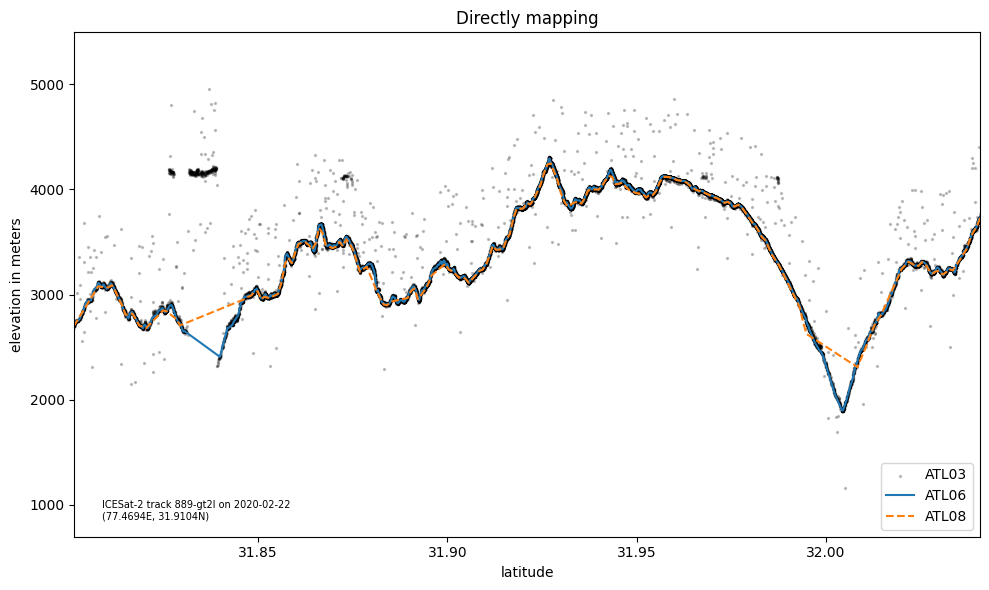

In [49]:
# Bounding box coordinates
left   = 77.301555
right  = 77.637165
bottom = 31.779603
top    = 32.041187

gtx = 'gt2l'
date = [["2020-02-22",889],
        ]

OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl03?date='+date[0][0]+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(date[0][1])+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'

# OA_API_URL += '&client=jupyter';
is2data = dataCollector(oaurl=OA_API_URL,beam=gtx, verbose=True)
is2data.requestData(verbose=True)
myplot, mydata = plot_from_oa_url(url=OA_API_URL, gtx=gtx, title='Directly mapping')

In [51]:
type(myplot)


matplotlib.figure.Figure

In [46]:
is2data.requestData(verbose=True)

---> requesting ATL03 data... Done.
---> requesting ATL06 data... Done.
---> requesting ATL08 data... Done.


In [ ]:
vars(is2data)

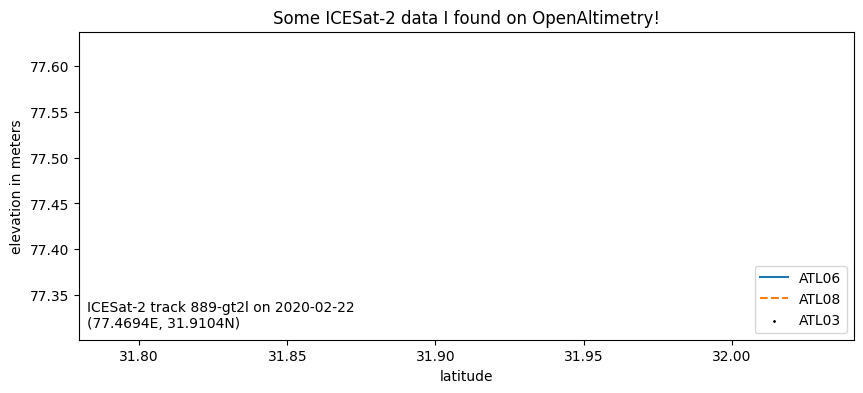

In [48]:
# create the figure and axis
fig, ax = plt.subplots(figsize=[10,4])
atl06, = ax.plot(is2data.atl06.lat, is2data.atl06.h, label='ATL06')
atl08, = ax.plot(is2data.atl08.lat, is2data.atl08.h, label='ATL08', linestyle='--')
atl03 = ax.scatter(is2data.atl03.lat, is2data.atl03.h, s=1, color='black', label='ATL03')

ax.set_xlim((bottom, top))
ax.set_ylim((left, right))

ax.set_xlabel('latitude')
ax.set_ylabel('elevation in meters')
ax.set_title('Some ICESat-2 data I found on OpenAltimetry!')

ax.legend(loc='lower right')

# add some text to provide info on what is plotted
info = 'ICESat-2 track {track:d}-{beam:s} on {date:s}\n({lon:.4f}E, {lat:.4f}N)'.format(track=is2data.track, 
                                                                                        beam=is2data.beam, 
                                                                                        date=is2data.date, 
                                                                                        lon=np.mean(is2data.lonlims), 
                                                                                        lat=np.mean(is2data.latlims))
infotext = ax.text(0.01, 0.03, info,
                   horizontalalignment='left', 
                   verticalalignment='bottom', 
                   transform=ax.transAxes,
                   bbox=dict(edgecolor=None, facecolor='white', alpha=0.9, linewidth=0))

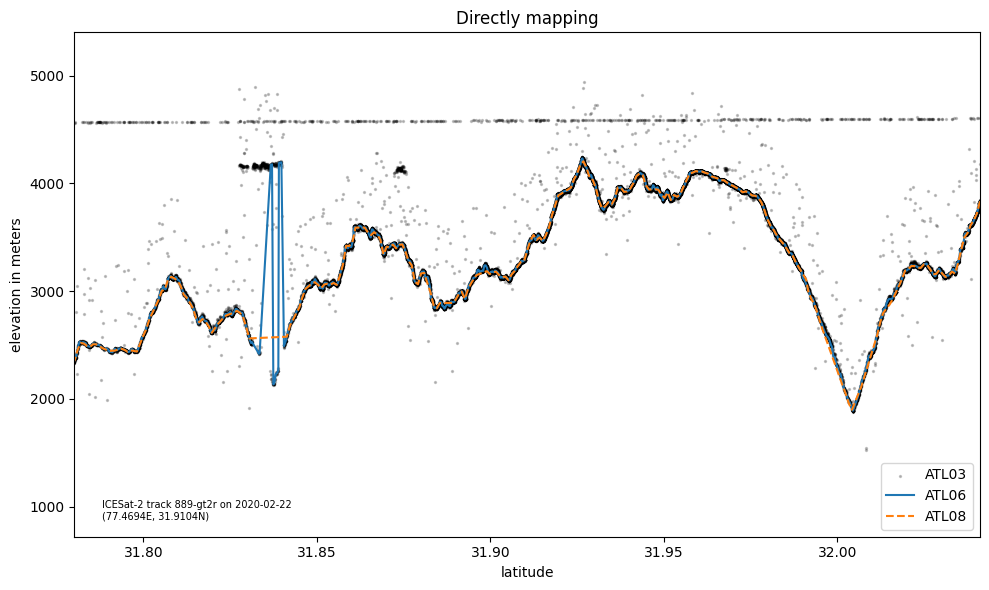

In [44]:
url = 'http://openaltimetry.org/data/api/icesat2/atl03?date=2020-01-16&minx=12.107692195781404&miny=-70.34956862465471&maxx=12.426364789894341&maxy=-70.2449105354736&trackId=312&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'
gtx = 'gt2r'
myplot, mydata = plot_from_oa_url(url=OA_API_URL, gtx=gtx, title='Directly mapping')

In [54]:
def dist_latlon2meters(lat1, lon1, lat2, lon2):
    # returns the distance between two coordinate points - (lon1, lat1) and (lon2, lat2) along the earth's surface in meters.
    R = 6371000
    def deg2rad(deg):
        return deg * (np.pi/180)
    dlat = deg2rad(lat2-lat1)
    dlon = deg2rad(lon2-lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(deg2rad(lat1)) * np.cos(deg2rad(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

lat1, lat2 = mydata.atl08.lat[0], mydata.atl08.lat.iloc[-1]
lon1, lon2 = mydata.atl08.lon[0], mydata.atl08.lon.iloc[-1]

ground_track_length = dist_latlon2meters(lat1, lon1, lat2, lon2)
print('The ground track is about %.1f kilometers long.' % (ground_track_length/1e3))

The ground track is about 27.4 kilometers long.
